In [8]:
import tensorflow as tf
from tensorflow.keras.applications.mobilenet_v3 import preprocess_input
import numpy as np
import os

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
path = "/content/drive/MyDrive/Colab Notebooks/Eye-Disease"

In [11]:
model = tf.keras.models.load_model(f"{path}/Trained_Eye_disease_model.keras")

/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 178 variables whereas the saved optimizer has 354 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ MobileNetV3Large (Functional)   │ (None, 1000)           │     5,507,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4)              │         4,004 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,998,474 (41.96 MB)

 Trainable params: 5,487,036 (20.93 MB)

 Non-trainable params: 24,400 (95.31 KB)

 Optimizer params: 5,487,038 (20.93 MB)

(1, 224, 224, 3)


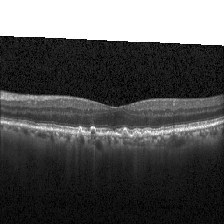

In [29]:
image_path = f"{path}/Dataset - train+val+test/test/DRUSEN/DRUSEN-95633-12.jpeg"
img = tf.keras.utils.load_img(image_path, target_size=(224, 224))
x = tf.keras.utils.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
print(x.shape)
img

In [31]:
pred = model.predict(x)
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step


array([[0.03954746, 0.00907993, 0.92566496, 0.02570761]], dtype=float32)

In [34]:
class_name = ['CNV', 'DME', 'DRUSEN', 'NORMAL']
result_index = np.argmax(pred)
print(f"Model Prediction: {class_name[result_index]}")

Model Prediction: DRUSEN
